# Intro to Python 

4 main packages:
* Scipy
* numpy
* astropy
* matplotlib

How to get these packages:
* Anaconda
* Canopy
* Ureka - includes classic astronomy
    - DS9
    - iraf
    - SExtractor

How to interact with Python:
* Ipython - interactive
* run from the command line


In [1]:
%matplotlib inline

In [2]:
import numpy as np

x = np.array([2., 4., 6.])
x

array([ 2.,  4.,  6.])

In [3]:
y = x**2 + 3.
y

array([  7.,  19.,  39.])

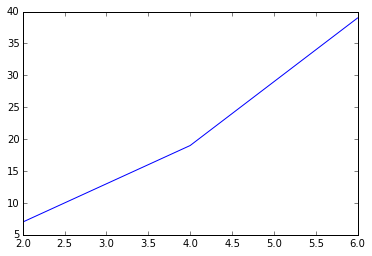

In [4]:
from matplotlib import pyplot
pyplot.plot(x, y)

In [5]:
x2 = np.arange(10)
x2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
x3 = np.linspace(12, 100, 35) #start = 12, end = 100, 35 points
x3

array([  12.        ,   14.58823529,   17.17647059,   19.76470588,
         22.35294118,   24.94117647,   27.52941176,   30.11764706,
         32.70588235,   35.29411765,   37.88235294,   40.47058824,
         43.05882353,   45.64705882,   48.23529412,   50.82352941,
         53.41176471,   56.        ,   58.58823529,   61.17647059,
         63.76470588,   66.35294118,   68.94117647,   71.52941176,
         74.11764706,   76.70588235,   79.29411765,   81.88235294,
         84.47058824,   87.05882353,   89.64705882,   92.23529412,
         94.82352941,   97.41176471,  100.        ])

Also a logspace.

Arrays are zero indexed

In [7]:
x2[3]

3

Slicing

In [8]:
x2[3:5] #include 3, exclude 5

array([3, 4])

In [9]:
x2[-3:] #index in from the other side

array([7, 8, 9])

In [10]:
x2[-3:27]

array([7, 8, 9])

Masking

In [11]:
mask = x2>6
mask

array([False, False, False, False, False, False, False,  True,  True,  True], dtype=bool)

Returns an array of Trues and Falses

In [12]:
x4 = x2[mask]
x4

array([7, 8, 9])

Shortcut

In [13]:
x4 = x2[x2>6]
x4

array([7, 8, 9])

Mask does not have to be based on the array you are indexing.

Numpy objects know how to perform operations on them

In [14]:
x2.mean()

4.5

In [15]:
x2.std()

2.8722813232690143

In [16]:
x2.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [17]:
np.median(x2)

4.5

To see what you can do to an array type:

    x2. tab

In [18]:
p =  np.random.random(9)
p

array([ 0.56037625,  0.21055958,  0.33718633,  0.24537692,  0.13930978,
        0.37106526,  0.39546726,  0.78269814,  0.51202228])

In [19]:
#Sort in place
q = p.copy()
q.sort()
q

array([ 0.13930978,  0.21055958,  0.24537692,  0.33718633,  0.37106526,
        0.39546726,  0.51202228,  0.56037625,  0.78269814])

In [20]:
#Get indices that sort p
z = np.argsort(p)

In [21]:
p[z]

array([ 0.13930978,  0.21055958,  0.24537692,  0.33718633,  0.37106526,
        0.39546726,  0.51202228,  0.56037625,  0.78269814])

2D arrays are indexed [row, column] which is counter intuitive for images since it is (y, x)

# fits files

fits: flexible image transport system

store data in a binary format

Basic unit: HDU
* header: ascii
* data: binary
    - image format
    - table format
Can have multi extension fits files which can have more than one HDU

# Back to Python

astropy has fits handling capabilities in it

For ascii data:

data = np.loadtxt('filename.txt') #This gives you a 2D array

col1, col2, col3 = np.loadtxt('filename.txt', unpack = True, usecols = (0, 3, 4)) #This loads columns 1, 4, 5

There may be an example on smartsite

In [22]:
from astropy.io import fits

In [23]:
hdulist = fits.open('ibq901baq_flt.fits')

In [24]:
hdulist.info()

Filename: ibq901baq_flt.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     245   ()              
1    SCI         ImageHDU       159   (4096, 2051)   float32   
2    ERR         ImageHDU        52   (4096, 2051)   float32   
3    DQ          ImageHDU        44   (4096, 2051)   int16   
4    SCI         ImageHDU       158   (4096, 2051)   float32   
5    ERR         ImageHDU        52   (4096, 2051)   float32   
6    DQ          ImageHDU        44   (4096, 2051)   int16   
7    D2IMARR     ImageHDU        15   (32, 17)     float32   
8    D2IMARR     ImageHDU        15   (32, 17)     float32   
9    D2IMARR     ImageHDU        15   (32, 17)     float32   
10   D2IMARR     ImageHDU        15   (32, 17)     float32   
11   WCSCORR     BinTableHDU     59   14R x 24C    [40A, I, A, 24A, 24A, 24A, 24A, D, D, D, D, D, D, D, D, 24A, 24A, D, D, D, D, J, 40A, 128A]   


Cards: words in the header

Dimensions: dimension of image data

Can view header like this (make sure your window is 80 characters wide)

!less ibq901baq_flt.fits

in Python 

In [25]:
data = hdulist[1].data #tell is to look at the first HDU

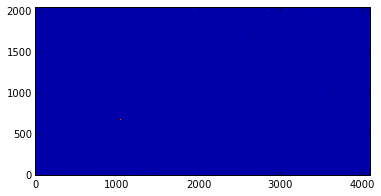

In [26]:
pyplot.imshow(data, origin = 'bottom', interpolation = 'nearest') 
#put 0, 0 in the lower left hand corner
#turn off interpolation (so you can see individual pixels

In [28]:
"""
Block comments can be denoted with triple quotes
"""

#individual line comments are denoted with the pound sign

'\nBlock comments can be denoted with triple quotes\n'

When writing a function triple quotes can be used to give a help string

In [31]:
import numpy as np
def calc_max(my_array):
    '''
    calculate the max of a given array
    '''
    return my_array.max()

calc_max(np.array([1., 2., 3., 16., 5., 6.]))

16.0

In [32]:
help(calc_max)

Help on function calc_max in module __main__:

calc_max(my_array)
    calculate the max of a given array

